# TensorFlow single_image_random_dot_stereograms (SIRDS) DEMO

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt    #not required for SIRDS
import matplotlib.image as mpimg   #not required for SIRDS
from tensorflow.contrib.image import single_image_random_dot_stereograms
%matplotlib inline
import numpy as np

Outputs a single image random dot stereogram for export via encode_PNG/JPG OP.

Given the 2-D tensor 'depth_values' with encoded Z values, this operation will 
encode 3-D data into a 2-D image.  The output of this Op is suitable for the
encode_PNG/JPG ops.  Be careful with image compression as this may corrupt the
encode 3-D data witin the image.

This Op is based upon:
'https://www.cs.waikato.ac.nz/~ihw/papers/94-HWT-SI-IHW-SIRDS-paper.pdf'

Example use which outputs a SIRDS image as picture_out.png:
```python
img=[[1,2,3,3,2,1],
     [1,2,3,4,5,2],
     [1,2,3,4,5,3],
     [1,2,3,4,5,4],
     [6,5,4,4,5,5]]

session = tf.InteractiveSession()

sirds = single_image_random_dot_stereograms(img,convergence_dots_size=8,number_colors=256,normalize=True)

out = sirds.eval()

png = tf.image.encode_png(out).eval()

with open('picture_out.png', 'wb') as f:
    f.write(png)
```

### Args:
```
depth_values: Z values of data to encode into 'output_data_window' window, 
  lower values are further away {0.0 floor(far), 1.0 ceiling(near) after normalization}, must be 2-D tensor
hidden_surface_removal: Activate hidden surface removal
convergence_dots_size: Black dot size in pixels to help view converge image, drawn on bottom of image
dots_per_inch: Output device in dots/inch
eye_separation: Separation between eyes in inches
mu: Depth of field, Fraction of viewing distance (eg. 1/3 = .3333)
normalize: Normalize input data to [0.0, 1.0] 
normalize_max: Fix MAX value for Normalization - if < MIN, autoscale
normalize_min: Fix MIN value for Normalization - if > MAX, autoscale
border_level: Value of bord in depth 0.0 {far} to 1.0 {near}
number_colors: 2 (Black & White),256 (grayscale), and Numbers > 256 (Full Color) are all that are supported currently
output_image_shape: Output size of returned image in X,Y, Channels 1-grayscale, 3 color (1024, 768, 1),
  channels will be updated to 3 if 'number_colors' > 256
output_data_window: Size of "DATA" window, must be equal to or smaller than 'output_image_shape', will be centered
  and use 'convergence_dots_size' for best fit to avoid overlap if possible
```

### Retuns:
```
image: A tensor of size 'output_image_shape' with the encloded 'depth_values'
```

In [16]:
session = tf.InteractiveSession()

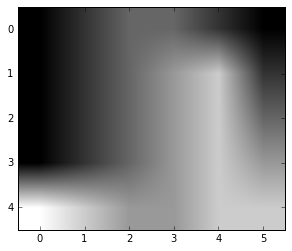

In [17]:
img=[[1,2,3,3,2,1],
     [1,2,3,4,5,2],
     [1,2,3,4,5,3],
     [1,2,3,4,5,4],
     [6,5,4,4,5,5]]

img=np.array(img)

sirds = single_image_random_dot_stereograms(img,mu=.3333,convergence_dots_size=8,hidden_surface_removal=True,
                                            number_colors=2,normalize=True,border_level=0.00)

imgplot = plt.imshow(img,cmap=plt.cm.gray)

In [18]:
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "2 Colors output, 1 color channel needed",out.shape

with open('picture_out_2Color.png', 'wb') as f:
    f.write(png)

2 Colors output, 1 color channel needed (768, 1024, 1)


## 2 Color SIRDS
<img src="./picture_out_2Color.png" />

In [19]:
sirds = single_image_random_dot_stereograms(img,mu=.3333,convergence_dots_size=8,hidden_surface_removal=True,
                                            number_colors=256,normalize=True,border_level=0.00)
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "256 Colors output, 1 color channel needed",out.shape

with open('picture_out_256Color.png', 'wb') as f:
    f.write(png)

256 Colors output, 1 color channel needed (768, 1024, 1)


## 256 Color SIRDS 
<img src="./picture_out_256Color.png" />

In [20]:
sirds = single_image_random_dot_stereograms(img,mu=.3333,convergence_dots_size=8,hidden_surface_removal=True,
                                            output_image_shape=[1024,768,3],normalize=True,border_level=0.00)
#Same as the following for true color, number_colors>256
#sirds = single_image_random_dot_stereograms(img,mu=.3333,convergence_dots_size=8,hidden_surface_removal=True,
#                                            number_colors=257,normalize=True,border_level=0.00)
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape

with open('picture_out_TrueColor.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## True Color SIRDS 
<img src="./picture_out_TrueColor.png" />

In [21]:
sirds = single_image_random_dot_stereograms(img,mu=.3333,convergence_dots_size=20,hidden_surface_removal=True,
                                            number_colors=257,normalize=True,border_level=0.00,
                                            output_data_window=[640,480])
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape

with open('picture_out_TrueColor_window.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## True Color SIRDS, 640x480 window with 1024x768 image, allows for large convergence dot size as well, set to 20
<img src="./picture_out_TrueColor_window.png" />

In [22]:
sirds = single_image_random_dot_stereograms(img,mu=.3333,convergence_dots_size=20,hidden_surface_removal=True,
                                            number_colors=257,normalize=True,border_level=0.50,
                                            output_data_window=[640,480])
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape

with open('picture_out_TrueColor_window_50.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## True Color SIRDS, 640x480 window with 1024x768 image, allows for large convergence dot size as well, set to 20
Border Level has been raised to 50% of depth range, note that convergence dots might be more difficult
to converge since they don't appear on the far plane or 0%
<img src="./picture_out_TrueColor_window_50.png" />

# CONE like shape

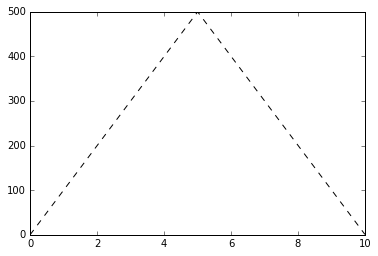

In [23]:
# Create a CONE type shape for demo
img=range(0,500)+range(499,0,-1)

x = np.linspace(0,10,999)
img2=np.array(img)
coneImage=np.array(img)
coneImage=coneImage.reshape(1,-1)
coneImage=coneImage*coneImage.T

plotout=plt.plot(x,img2,'k--')

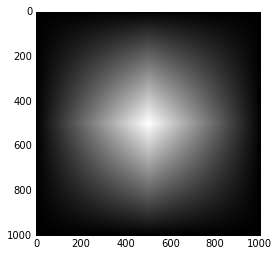

In [24]:
plotout=plt.imshow(coneImage,cmap=plt.cm.gray)

In [25]:
sirds = single_image_random_dot_stereograms(coneImage,mu=.3333,convergence_dots_size=20,hidden_surface_removal=True,
                                            number_colors=257,normalize=True,border_level=0.00,
                                            output_data_window=[640,480])

out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape

with open('picture_out_TrueColor_cone.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## Cone like image
<img src="./picture_out_TrueColor_cone.png" />

In [26]:
sirds = single_image_random_dot_stereograms(coneImage,mu=.6666,convergence_dots_size=20,hidden_surface_removal=True,
                                            number_colors=257,normalize=True,border_level=0.00,
                                            output_data_window=[640,480])
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape

with open('picture_out_TrueColor_cone_66.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## Cone like image with larger field of depth 66%
<img src="./picture_out_TrueColor_cone_66.png" />

In [27]:
sirds = single_image_random_dot_stereograms(coneImage,mu=.6666,convergence_dots_size=20,hidden_surface_removal=True,
                                            number_colors=257,normalize=True,border_level=0.500,
                                            output_data_window=[640,480])
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape
with open('picture_out_TrueColor_cone_66_border_50.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## Cone like image full color Border level 50%
<img src="./picture_out_TrueColor_cone_66_border_50.png" />

In [28]:
sirds = single_image_random_dot_stereograms(coneImage,mu=.6666,convergence_dots_size=20,hidden_surface_removal=False,
                                            number_colors=257,normalize=True,border_level=1.00,
                                            output_data_window=[640,480])
out = sirds.eval()

png = tf.image.encode_png(out,compression=-1).eval()
print "True Colors output, 3 color channels needed",out.shape

with open('picture_out_TrueColor_cone_66_border_artifact.png', 'wb') as f:
    f.write(png)

True Colors output, 3 color channels needed (768, 1024, 3)


## Cone like image with border artifact due to hidden surface FALSE
<img src="./picture_out_TrueColor_cone_66_border_artifact.png" />